MSE: 205.98840388260462
R squared error: 0.9648691086523001


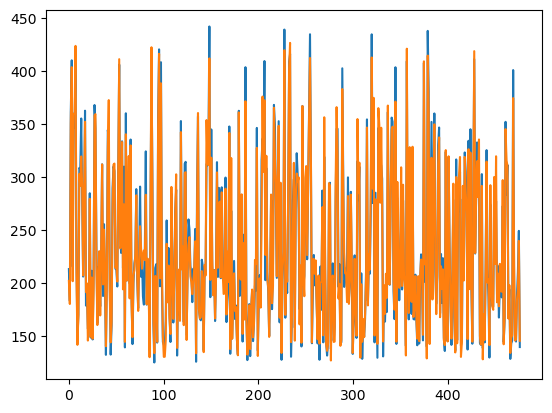

[[198.5200043  202.03073887]
 [178.5399933  180.30645992]
 [345.0899963  350.31168115]
 [398.3599854  403.48660489]
 [197.3999939  201.77619445]
 [351.8099976  359.38256224]
 [357.7799988  359.37389771]
 [416.9400024  423.52695739]
 [207.2400055  209.90236455]
 [140.3999939  141.80433974]
 [166.2899933  169.91319583]
 [302.         302.9437735 ]
 [288.230011   291.57683154]
 [314.2799988  319.37289343]
 [289.1900024  292.04657189]
 [202.0800018  207.1599414 ]
 [263.9899902  272.15596618]
 [345.7600098  351.90447246]
 [185.7700043  191.49265346]
 [197.5700073  199.7568844 ]
 [144.1499939  145.84891452]
 [166.8699951  168.81798795]
 [273.6400146  279.42292231]
 [147.         149.41117559]
 [202.0899963  205.17047725]
 [142.1600037  147.60151484]
 [191.6600037  194.58848091]
 [352.2600098  357.95830324]
 [355.9299927  359.23329853]
 [212.3099976  215.79729663]
 [156.9700012  160.46868571]
 [201.3000031  204.53000416]
 [218.2100067  230.07731268]
 [167.3500061  169.53343421]
 [225.0099945 

In [5]:
#Simple Linear Regression Test 
#9/30/2024

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

data = pd.read_csv('berkshire_hathaway_data.csv')

#All given features
X = data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].values

#next day, 5 days out, and thirty days out
y1 = data[['N. D. C.']].values
y5 = data[['Five Out']].values
y30 = data[['Thirty Out']].values

#decide what length to test for
y = y30

#set up vectors
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=325)
test_size = np.array(X_test.shape[0])           #for graphing
x_axis = np.linspace(0,test_size, test_size)    #for graphing

#train and evaluate model
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, y_train)
y_linreg = lin_reg_model.predict(X_test)
r2_linreg = r2_score(y_test, y_linreg)
mse_linreg = mean_squared_error(y_test, y_linreg)
print(f'MSE: {mse_linreg}\nR squared error: {r2_linreg}')

#compare real values and what was predicted, graphically 
plt.plot(x_axis, y_test)
plt.plot(x_axis, y_linreg)
plt.show()

#compare a given day's close (left) with forecasted close after however many days (right)
##to see if the predicted change is significant
comp = np.c_[X_test[:,3], y_linreg]
print(comp)